# Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
import plotly.express as px
import seaborn as sns

# Importing the Dataset

In [2]:
# Try to load the dataset from the local file, If not possible, then defaults to google drive version

def getfile(location_pair,**kwargs):
    (loc,gdrive)=location_pair
    try:
        out=pd.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out = pd.read_csv(loc,**kwargs)
    return out


fname=("Local_Area_Unemployment_Statistics__LAUS_.csv","https://drive.google.com/file/d/1xoDHEKiN-y4QyZNET8SdlVRSsgW_7TLy/view?usp=sharing")
raw_data = getfile(fname)
raw_data.head()

local file not found; accessing Google Drive


,Area Type,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate
0,State,California,01/01/1976,1976,January,N,Final,9672362,8668016,1004346,0.104
1,State,California,01/01/1976,1976,January,Y,Final,9774280,8875685,898595,0.092
2,County,Los Angeles County,01/01/1976,1976,January,N,Final,3364151,3040058,324093,0.096
3,County,Los Angeles County,01/01/1976,1976,January,Y,Final,3381856,3081806,300050,0.089
4,Metropolitan Area,Los Angeles-Long Beach-Glendale MD,01/01/1976,1976,January,N,Final,3364151,3040058,324093,0.096


#Getting information about data and pre-*processing*

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191127 entries, 0 to 191126
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Area Type                      191127 non-null  object 
 1   Area Name                      191127 non-null  object 
 2   Date                           191127 non-null  object 
 3   Year                           191127 non-null  int64  
 4   Month                          191127 non-null  object 
 5   Seasonally Adjusted (Y/N)      191127 non-null  object 
 6   Status (Preliminary / Final)   191127 non-null  object 
 7   Labor Force                    191127 non-null  int64  
 8   Employment                     191127 non-null  int64  
 9   Unemployment                   191127 non-null  int64  
 10  Unemployment Rate              191127 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 16.0+ MB


In [4]:
raw_data['Date']= pd.to_datetime(raw_data['Date'])
raw_data['ts'] = raw_data.Date.values.astype(np.int64) # convert datetime to pandas timestamps
raw_data['Employment Rate']=raw_data['Employment ']/raw_data['Labor Force']




*   We can infer that there is no null value in the dataset
*   We have total of 191127 columns
*   We have 3 data-types: Float, Integer & Object
*   Date is of type Object and we need to convert it to datetime



In [5]:
df_preprocessed = raw_data.loc[raw_data['Labor Force'] != 0]
df_preprocessed.rename(columns={'Area Name ' : 'Area Name', 'Area Type ' : 'Area Type', 'Year ' : 'Year', 'Seasonally Adjusted (Y/N) ' : 'Seasonally Adjusted', 'Employment ' : 'Employment', 'Employment Rate ':'Employment Rate','Unemployment ' : 'Unemployment', 'Unemployment Rate ': 'Unemployment Rate'}, inplace=True)
df_preprocessed = df_preprocessed[['Area Name', 'Area Type', 'Date', 'Month', 'Year', 'Seasonally Adjusted', 'Labor Force', 'Employment', 'Employment Rate', 'Unemployment', 'Unemployment Rate']]
df_preprocessed.reset_index(inplace=True)
df_preprocessed['Date'] = pd.to_datetime(df_preprocessed['Date'])
df_preprocessed.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,index,Area Name,Area Type,Date,Month,Year,Seasonally Adjusted,Labor Force,Employment,Employment Rate,Unemployment,Unemployment Rate
0,0,California,State,1976-01-01,January,1976,N,9672362,8668016,0.896163,1004346,0.104
1,1,California,State,1976-01-01,January,1976,Y,9774280,8875685,0.908065,898595,0.092
2,2,Los Angeles County,County,1976-01-01,January,1976,N,3364151,3040058,0.903663,324093,0.096
3,3,Los Angeles County,County,1976-01-01,January,1976,Y,3381856,3081806,0.911277,300050,0.089
4,4,Los Angeles-Long Beach-Glendale MD,Metropolitan Area,1976-01-01,January,1976,N,3364151,3040058,0.903663,324093,0.096


In [6]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188705 entries, 0 to 188704
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   index                188705 non-null  int64         
 1   Area Name            188705 non-null  object        
 2   Area Type            188705 non-null  object        
 3   Date                 188705 non-null  datetime64[ns]
 4   Month                188705 non-null  object        
 5   Year                 188705 non-null  int64         
 6   Seasonally Adjusted  188705 non-null  object        
 7   Labor Force          188705 non-null  int64         
 8   Employment           188705 non-null  int64         
 9   Employment Rate      188705 non-null  float64       
 10  Unemployment         188705 non-null  int64         
 11  Unemployment Rate    188705 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 17.3

Data type of Date is changed

In [ ]:
#df_preprocessed.to_csv('df_preprocessed.csv')

# converting Data into pickle

In [7]:
# Creating a pickle of the pre-processed file

df_preprocessed.to_pickle('df_preprocessed.pkl')    #to save the data pickle
df_preprocessed_pkl = pd.read_pickle('df_preprocessed.pkl') #to load pickle back to the dataframe df1
df_preprocessed_pkl.drop(columns=['index'], inplace=True)
df_preprocessed_pkl.head()

,Area Name,Area Type,Date,Month,Year,Seasonally Adjusted,Labor Force,Employment,Employment Rate,Unemployment,Unemployment Rate
0,California,State,1976-01-01,January,1976,N,9672362,8668016,0.896163,1004346,0.104
1,California,State,1976-01-01,January,1976,Y,9774280,8875685,0.908065,898595,0.092
2,Los Angeles County,County,1976-01-01,January,1976,N,3364151,3040058,0.903663,324093,0.096
3,Los Angeles County,County,1976-01-01,January,1976,Y,3381856,3081806,0.911277,300050,0.089
4,Los Angeles-Long Beach-Glendale MD,Metropolitan Area,1976-01-01,January,1976,N,3364151,3040058,0.903663,324093,0.096


In [8]:
# Creating a pickle of a sample data for the debugging dataset

df_preprocessed_debug = df_preprocessed.sample(n = 1500)
#df_preprocessed_debug.to_csv('df_preprocessed_debug.csv', index = False)
df_preprocessed_debug.to_pickle('df_preprocessed_debug.pkl')    #to save the data pickle
df_preprocessed_debug_pkl = pd.read_pickle('df_preprocessed_debug.pkl') #to load pickle back to the dataframe df1
df_preprocessed_debug_pkl.drop(columns=['index'], inplace=True)
df_preprocessed_debug_pkl.head()

,Area Name,Area Type,Date,Month,Year,Seasonally Adjusted,Labor Force,Employment,Employment Rate,Unemployment,Unemployment Rate
135749,Fresno MSA,Metropolitan Area,1997-10-01,October,1997,N,367000,317000,0.863760,50000,0.136
173940,California,State,2019-12-01,December,2019,N,19493000,18742400,0.961494,750600,0.039
114774,Santa Ana city,Sub-County Place,2017-08-01,August,2017,N,156800,150700,0.961097,6200,0.039
42754,Rosedale CDP,Sub-County Place,2020-03-01,March,2020,N,9500,8800,0.926316,700,0.077
36688,Ramona CDP,Sub-County Place,2014-03-01,March,2014,N,10500,9700,0.923810,800,0.076


# Lets Visualize some important components to extract valuable relations

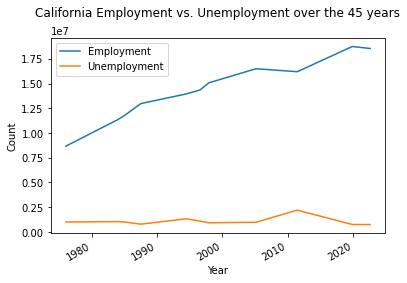

In [9]:
# Lets check how employment and unemployment rate have varied over the years

countySubData = df_preprocessed_debug_pkl.loc[(df_preprocessed_debug_pkl['Area Type']=='County')]
stateSubData = df_preprocessed_debug_pkl.loc[(df_preprocessed_debug_pkl['Area Type']=='State')]

GraphPlotter = stateSubData[['Date', 'Employment','Unemployment']]
GraphPlotter.set_index(["Date"], inplace=True)
GraphPlotter.plot(title="California Employment vs. Unemployment over the 45 years\n", ylabel="Count", xlabel="Year")

<ipython-input-10-3d3e5b971e10>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stateSubData['Employment Rate']=stateSubData['Employment']/stateSubData['Labor Force']


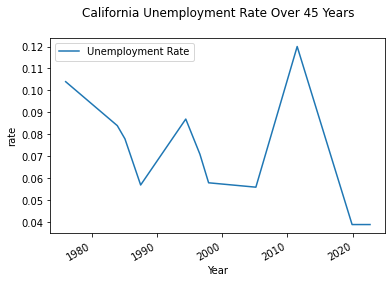

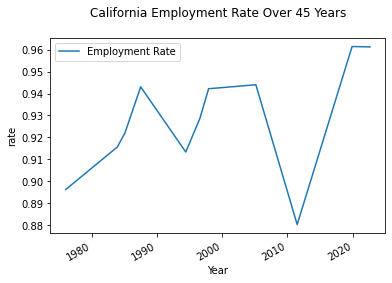

In [10]:
GraphPlotter1 = stateSubData[['Date','Unemployment Rate']]
GraphPlotter1.set_index(["Date"], inplace=True)
GraphPlotter1.plot(title="California Unemployment Rate Over 45 Years\n", ylabel="rate", xlabel="Year")

stateSubData['Employment Rate']=stateSubData['Employment']/stateSubData['Labor Force']

GraphPlotter2 = stateSubData[['Date','Employment Rate']]
GraphPlotter2.set_index(["Date"], inplace=True)
GraphPlotter2.plot(title="California Employment Rate Over 45 Years\n", ylabel="rate", xlabel="Year")

In [11]:
df_preprocessed_debug_pkl['Area Type'].unique()

array(['Metropolitan Area', 'State', 'Sub-County Place', 'County', 'MSA',
       'Metro Division'], dtype=object)

In [12]:
# Check how labor force is distributed
laborPopulation = df_preprocessed_debug_pkl[["Area Type", "Labor Force"]]
figure = px.sunburst(laborPopulation, path=["Area Type"], 
                     values="Labor Force", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Labor Force")
figure.show()

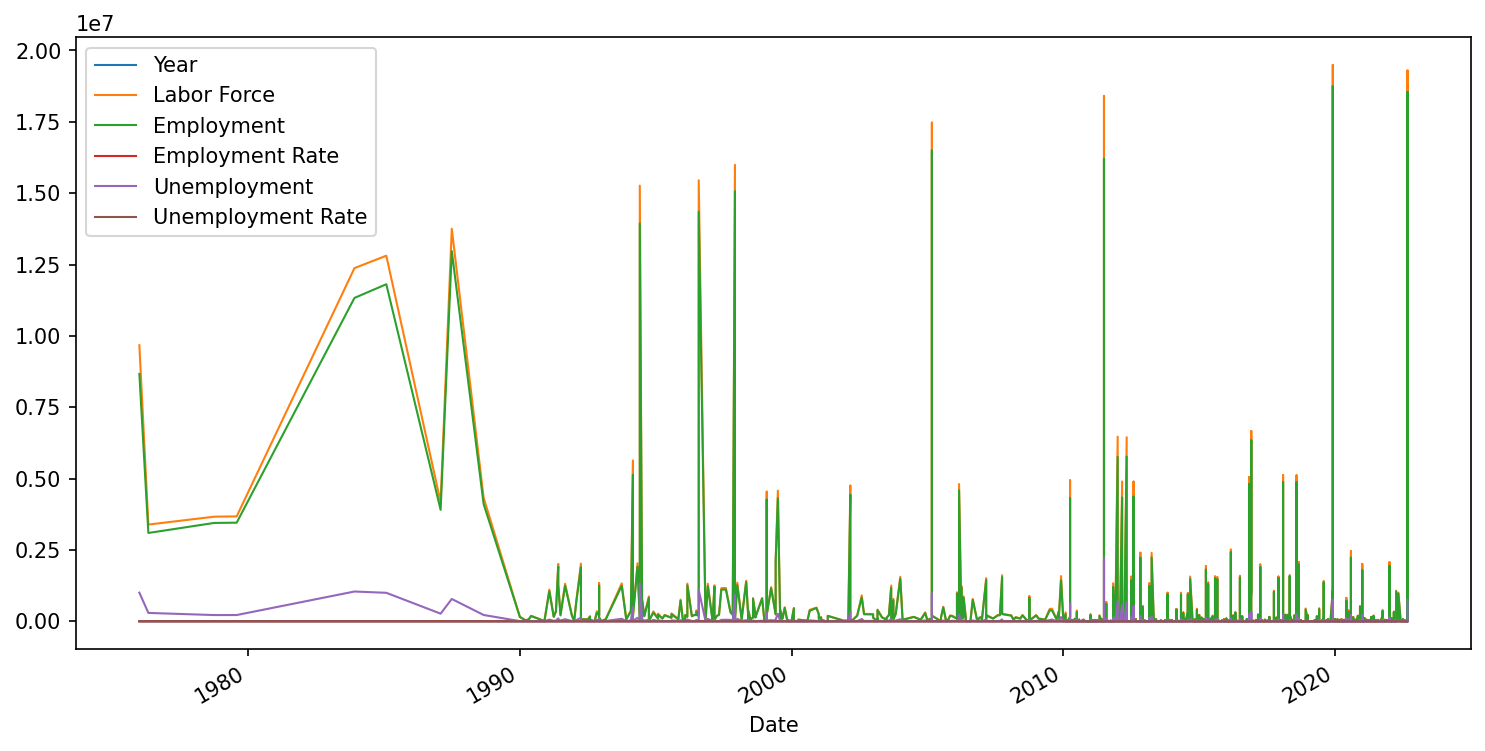

In [13]:
# Lets look at the relation between Date and all the other attributes

plt.figure(figsize=(12, 6), dpi=150)
df_preprocessed_debug_pkl.plot(x='Date', linewidth=1, ax = plt.gca())

In [14]:
# Understanding maximum and minimum unemployment rate areas
df_preprocessed_debug_pkl.groupby('Unemployment Rate').max()

,Area Name,Area Type,Date,Month,Year,Seasonally Adjusted,Labor Force,Employment,Employment Rate,Unemployment
Unemployment Rate,,,,,,,,,,
0.000,Yosemite Valley CDP,Sub-County Place,2022-03-01,September,2022,N,1400,1400,1.000000,0
0.003,Lower Lake CDP,Sub-County Place,2022-09-01,September,2022,N,1500,1500,1.000000,0
0.004,Avalon city,Sub-County Place,2018-06-01,June,2018,N,2100,2100,1.000000,0
0.006,Kernville CDP,Sub-County Place,2020-01-01,January,2020,N,400,400,1.000000,0
0.007,Knightsen CDP,Sub-County Place,2019-04-01,April,2019,N,600,600,1.000000,0
...,...,...,...,...,...,...,...,...,...,...
0.484,Shoshone CDP,Sub-County Place,2011-11-01,November,2011,N,30,20,0.666667,20
0.500,Keddie CDP,Sub-County Place,2020-02-01,February,2020,N,30,20,0.666667,20
0.520,Shoshone CDP,Sub-County Place,2010-10-01,October,2010,N,30,10,0.333333,10


In [15]:
# Checking overall number of area types
count = df_preprocessed_debug_pkl.groupby('Area Type').count()
print(count['Year'])

Area Type
County                163
MSA                    89
Metro Division         12
Metropolitan Area      85
State                  11
Sub-County Place     1140
Name: Year, dtype: int64


In [16]:
df_preprocessed_debug_pkl.groupby(['Area Type','Area Name']).count()

Date  Month  Year  Seasonally Adjusted  \
Area Type        Area Name                                                     
County           Alameda County          2      2     2                    2   
                 Alpine County           2      2     2                    2   
                 Amador County           2      2     2                    2   
                 Butte County            3      3     3                    3   
                 Calaveras County        3      3     3                    3   
...                                    ...    ...   ...                  ...   
Sub-County Place Yosemite Valley CDP     3      3     3                    3   
                 Yountville town         1      1     1                    1   
                 Yreka city              2      2     2                    2   
                 Yuba City city          2      2     2                    2   
                 Yucca Valley town       1      1     1                    1   

                                      Labor Force  Employment  \
Area Type        Area Name                                      
County           Alameda County                 2           2   
                 Alpine County                  2           2   
                 Amador County                  2           2   
                 Butte County                   3           3   
                 Calaveras County               3           3   
...                                           ...         ...   
Sub-County Place Yosemite Valley CDP            3           3   
                 Yountville town                1           1   
                 Yreka city                     2           2   
                 Yuba City city                 2           2   
                 Yucca Valley town              1           1   

                                      Employment Rate  Unemployment  \
Area Type        Area Name                                            
County           Alameda County                     2             2   
                 Alpine County                      2             2   
                 Amador County                      2             2   
                 Butte County                       3             3   
                 Calaveras County                   3             3   
...                                               ...           ...   
Sub-County Place Yosemite Valley CDP                3             3   
                 Yountville town                    1             1   
                 Yreka city                         2             2   
                 Yuba City city                     2             2   
                 Yucca Valley town                  1             1   

                                      Unemployment Rate  
Area Type        Area Name                               
County           Alameda County                       2  
                 Alpine County                        2  
                 Amador County                        2  
                 Butte County                         3  
                 Calaveras County                     3  
...                                                 ...  
Sub-County Place Yosemite Valley CDP                  3  
                 Yountville town                      1  
                 Yreka city                           2  
                 Yuba City city                       2  
                 Yucca Valley town                    1  

[771 rows x 9 columns]

In [17]:
color = ['Red','yellow','Green','blue','black','orange','violet']

## **Highest Rates of Unemployment by States**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



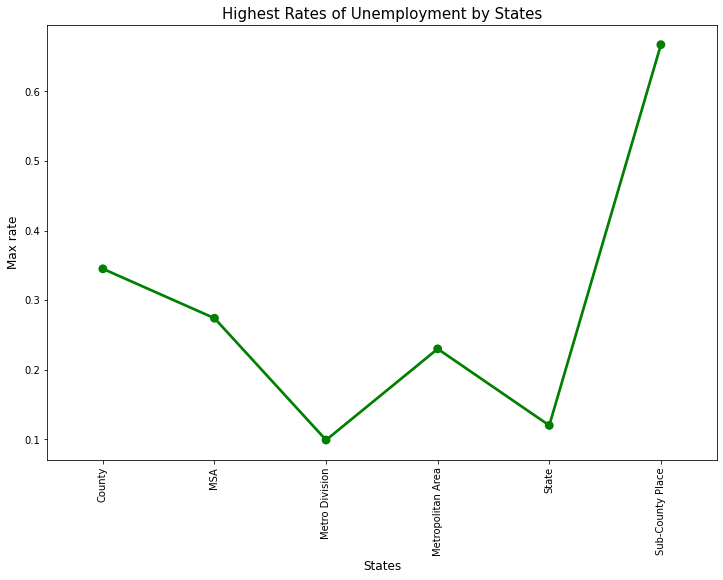

In [18]:
group = df_preprocessed_debug_pkl.groupby(['Area Type'])["Unemployment Rate"].aggregate("max").reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(group['Area Type'].values, group['Unemployment Rate'].values, alpha=0.8, color=color[2])
plt.ylabel('Max rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Highest Rates of Unemployment by States", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

## **Highest Rates of Unemployment by Year**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



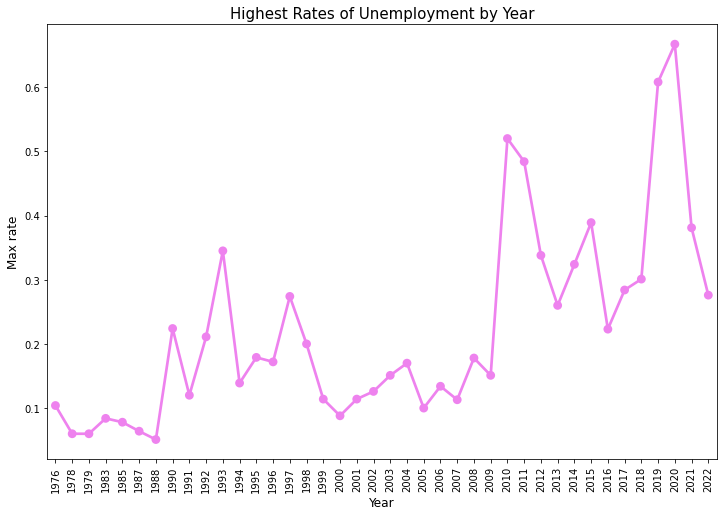

In [19]:
group = df_preprocessed_debug_pkl.groupby(["Year"])["Unemployment Rate"].aggregate("max").reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(group['Year'].values, group['Unemployment Rate'].values, alpha=0.8, color=color[6])
plt.ylabel('Max rate', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title("Highest Rates of Unemployment by Year", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

## **Highest Rates of Unemployment by Month**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



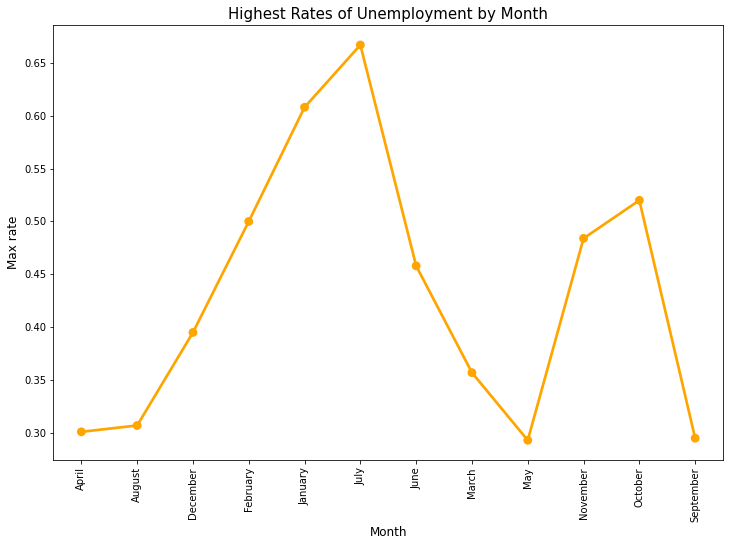

In [20]:
#Unemployment rate by month
group = df_preprocessed_debug_pkl.groupby(["Month"])["Unemployment Rate"].aggregate("max").reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(group['Month'].values, group['Unemployment Rate'].values, alpha=0.8, color=color[5])
plt.ylabel('Max rate', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title("Highest Rates of Unemployment by Month", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

## **Unemployment Rate Area Type wise**

In [21]:
unemploment = df_preprocessed_debug_pkl[["Area Type", "Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Area Type"], 
                     values="Unemployment Rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate")
figure.show()

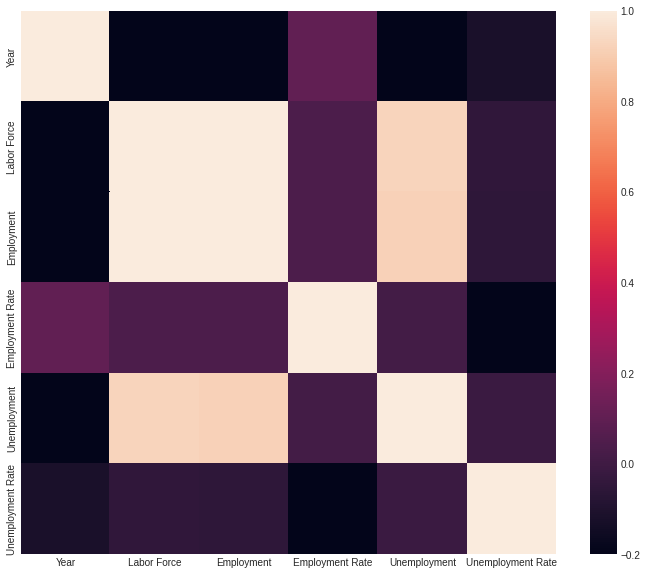

In [22]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(df_preprocessed_debug_pkl.corr(),vmin=-0.2, vmax=1)
plt.show()

Heatmap of differnt columns indicating the corleation between any two given column. Negative sign indicates the inverse relation between them.

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



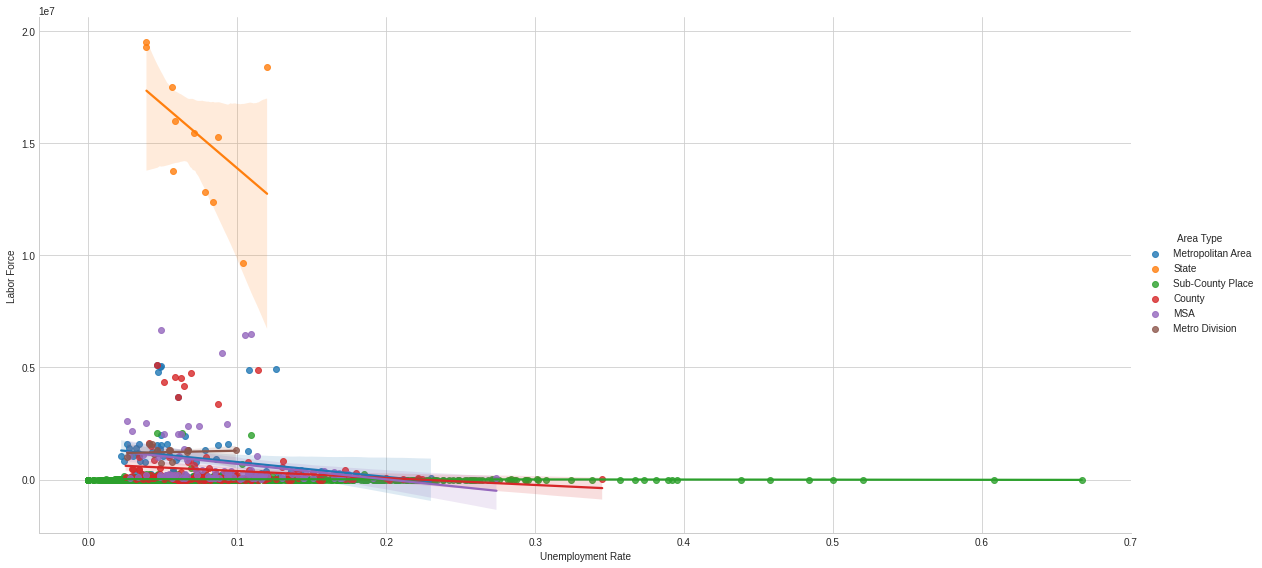

In [23]:
sns.lmplot(x ='Unemployment Rate', y ='Labor Force', hue="Area Type", size = 8, aspect = 2, data = df_preprocessed_debug_pkl)

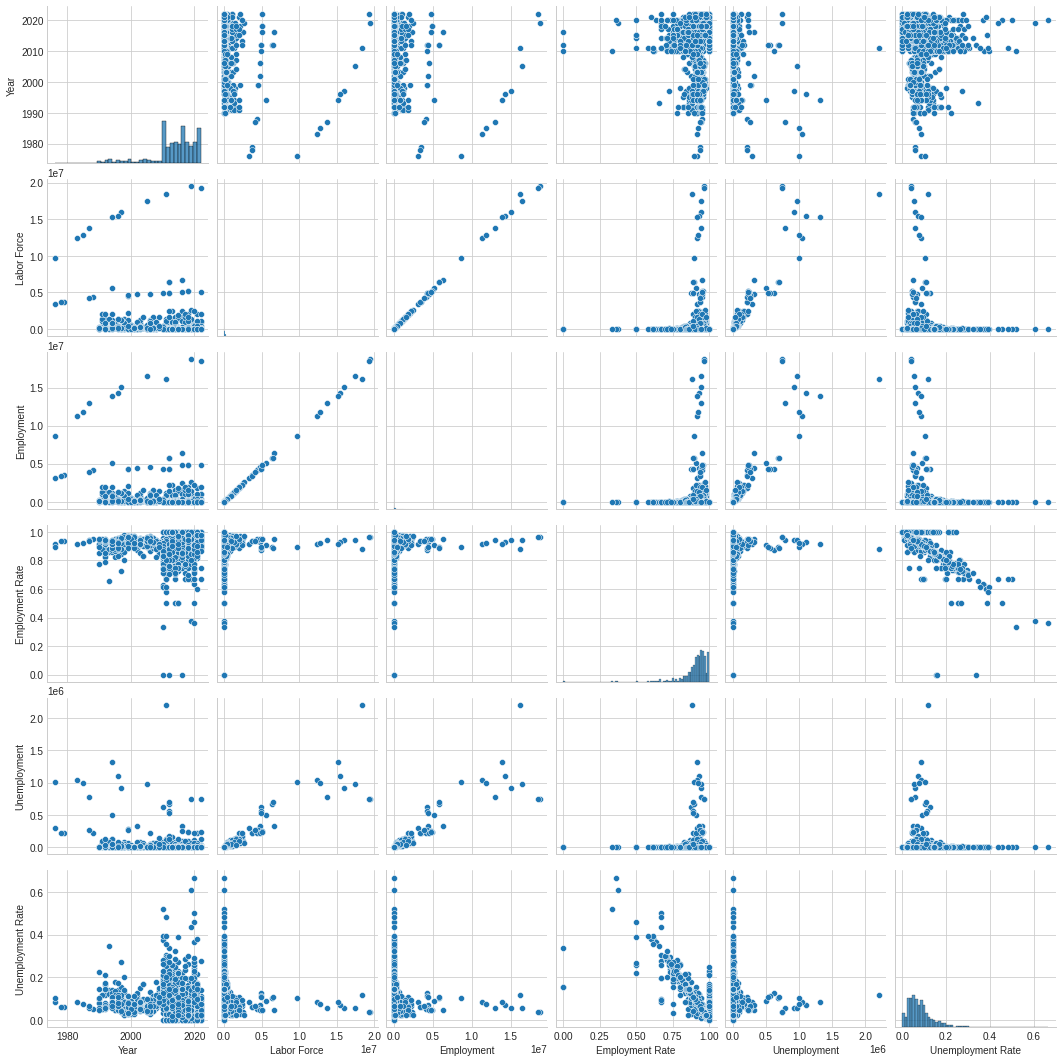

In [24]:
sns.pairplot(df_preprocessed_debug_pkl)

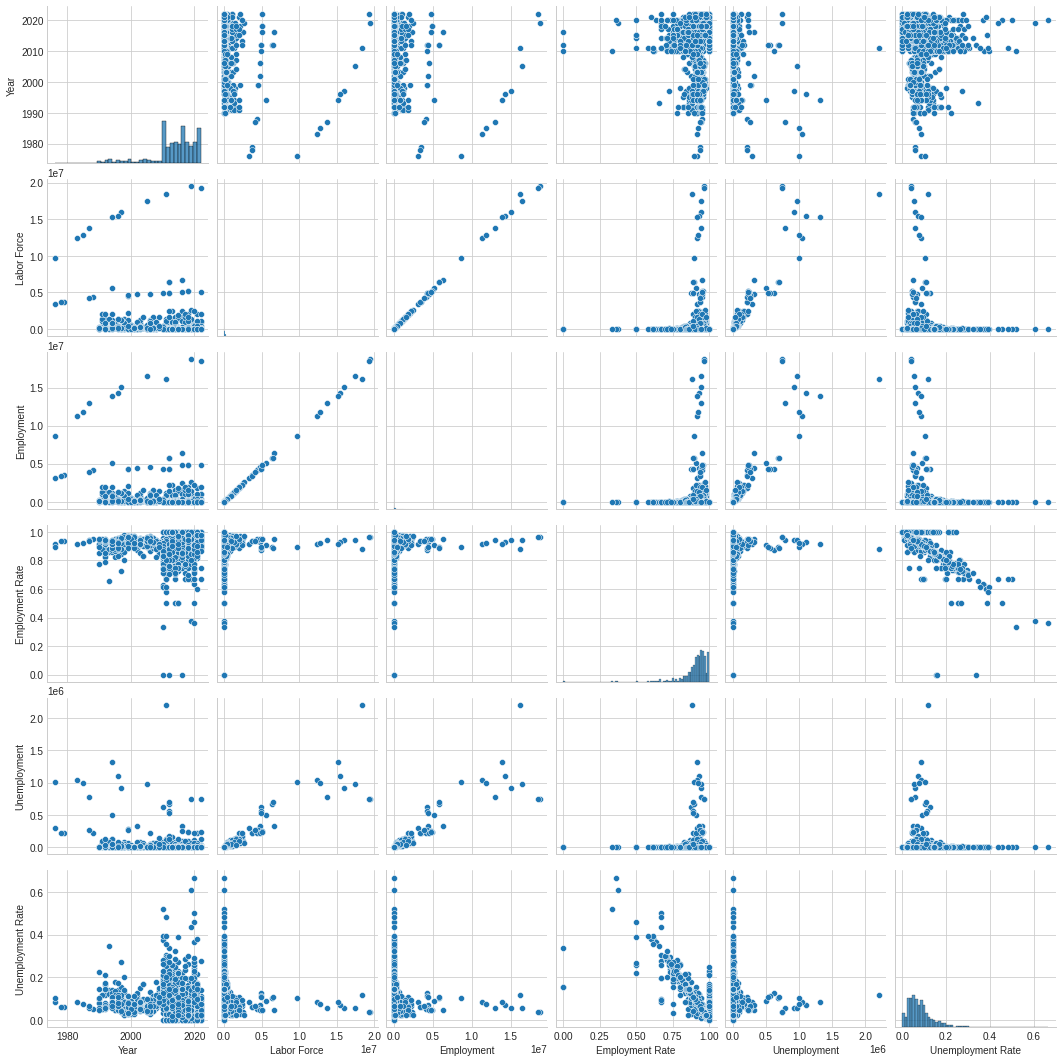

In [25]:
sns.pairplot(df_preprocessed_debug_pkl,hue_order=["Area Type","Area Name"])

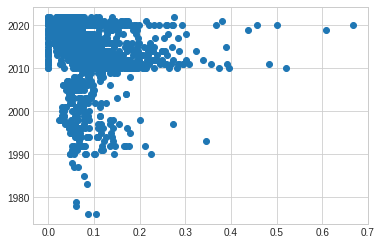

In [26]:
plt.scatter(df_preprocessed_debug_pkl['Unemployment Rate'], df_preprocessed_debug_pkl['Year'])

## **Propotion of Seasonally adjusted values**

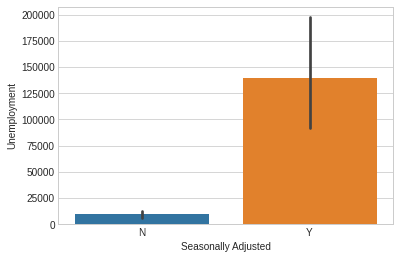

In [27]:
sns.barplot(y ='Unemployment', x ='Seasonally Adjusted', data = df_preprocessed_debug_pkl)

Significance of the column 'Seasonally Adjusted' is not of much importance as most of the values have 'Y'

In [28]:
df_preprocessed_debug_pkl.corr()

,Year,Labor Force,Employment,Employment Rate,Unemployment,Unemployment Rate
Year,1.000000,-0.231479,-0.229165,0.102872,-0.242980,-0.117421
Labor Force,-0.231479,1.000000,0.999570,0.041257,0.928582,-0.049509
Employment,-0.229165,0.999570,1.000000,0.043350,0.917303,-0.052094
Employment Rate,0.102872,0.041257,0.043350,1.000000,0.011654,-0.831436
Unemployment,-0.242980,0.928582,0.917303,0.011654,1.000000,-0.012984
Unemployment Rate,-0.117421,-0.049509,-0.052094,-0.831436,-0.012984,1.000000


# Training using linear regression provided by sklearn library

Here, for reference, we perform a linear regression on the dataset. According to co-relation data above, we see that Year, Labor Force and Emplyment have varied numbers indicating that we can see how they infulence the model. 
Hence, we use these columns only to predict the unemployment rate.
In future steps, we will incorporate other columns to make the decision more informed.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X_new=df_preprocessed_debug_pkl[['Year', 'Labor Force', 'Employment']]
y= df_preprocessed_debug_pkl['Unemployment Rate']
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)
clf = LinearRegression().fit(X_train,y_train)

In [30]:
# Check prediction and calculate the MSE for the model
y_pred=clf.predict(X_test)
print(mean_squared_error(y_test,y_pred))

0.004125164715119104


MSE for the model generated.

Milestone 3 in different Collab file in drive:

https://drive.google.com/drive/folders/1-3iXOdfQqpFAzPqGeKGZ0OWwcZNFir3D

or in Colab file:
## https://colab.research.google.com/drive/1p-EuPJZ354BjQWaEkDlTFxpdPmdALaCM#scrollTo=c2kKJyDlYLvA
